# Задание 1.

Поработаем с датасетом Black Friday. Есть его описание:

Description

The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

Classification problem can also be settled in this dataset since several variables are categorical, and some other approaches could be "Predicting the age of the consumer" or even "Predict the category of goods bought". This dataset is also particularly convenient for clustering and maybe find different clusters of consumers within it.

In [152]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [153]:
data = pd.read_csv('BlackFriday.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [154]:
set(data.Gender) # Можно заменить на 0 1

{'F', 'M'}

In [155]:
set(data.Age) # Можно заменить на 1 2 3 4 5 

{'0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'}

In [156]:
set(data.City_Category) # One-Hot Encoding

{'A', 'B', 'C'}

# Подготовка данных

In [157]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

Product_Category_3    69.441029
Product_Category_2    31.062713
dtype: float64 %


Скорее всего NaN-ы в Product_Category_2 и Product_Category_3 означают, что человек не покупал продукты из этих категорий.

Поэтому можем заменить эти пропущенные значения на 0.

In [158]:
data = data.fillna(0)

In [159]:
data.shape

(537577, 12)

In [160]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0] / data.shape[0]
print(f'{missing_values * 100} %')

Series([], dtype: float64) %


Посмотрим, какие типы данных есть в нашем датасете. 

Выведите на экран тип каждой колонки в таблице.

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Product_Category_3          537577 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


Обработаем нечисловые колонки.

1) Выведите на экран все возможные значения из столбца Gender.

2) Замените значение 'M' на 1, а 'F' на 0.

In [162]:
data.Gender = data.Gender.apply(lambda x: 1 if x == 'M' else 0)

Поработаем со столбцом Age.

1) Выведите на экран все возможные значения из столбца Age.

2) Напишите функцию для перевода каждого диапазона возрастов в число (самые маленькие возрасты - 0, следующий диапазон - 1 и т.д.). Замените значения в столбце Age на числовые, применив эту функцию.

In [163]:
def map_age(age):
    dct = {'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7}
    return dct[age]
    
data['Age'] = data['Age'].apply(map_age)

Обработаем столбец City_Category.

1) Выведите все уникальные значения данного столбца.

2) Закодируйте столбец с помощью OneHotEncoding (get_dummies).

In [164]:
data = pd.get_dummies(data, columns=['City_Category'], drop_first=True)

In [165]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,1000001,P00069042,0,1,10,2,0,3,0.0,0.0,8370,False,False
1,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200,False,False
2,1000001,P00087842,0,1,10,2,0,12,0.0,0.0,1422,False,False
3,1000001,P00085442,0,1,10,2,0,12,14.0,0.0,1057,False,False
4,1000002,P00285442,1,7,16,4+,0,8,0.0,0.0,7969,False,True


Наконец, обработаем Stay_In_Current_City_Years.

1) Выведите на экран все уникальные значения данного столбца.

2) Замените '4+' на 4, а все остальные значения оставьте как есть, но переведите их в числовой вид (x -> int(x)).

In [166]:
def map_stay(years):
    if years == '4+':
        return 4
    else:
        return int(years)
    
data['Stay_In_Current_City_Years'] = \
    data['Stay_In_Current_City_Years'].apply(map_stay)

In [167]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,1000001,P00069042,0,1,10,2,0,3,0.0,0.0,8370,False,False
1,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200,False,False
2,1000001,P00087842,0,1,10,2,0,12,0.0,0.0,1422,False,False
3,1000001,P00085442,0,1,10,2,0,12,14.0,0.0,1057,False,False
4,1000002,P00285442,1,7,16,4,0,8,0.0,0.0,7969,False,True


Удалим столбцы User_ID и Product_ID.

In [168]:
data.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)

In [169]:
data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,0,1,10,2,0,3,0.0,0.0,8370,False,False
1,0,1,10,2,0,1,6.0,14.0,15200,False,False
2,0,1,10,2,0,12,0.0,0.0,1422,False,False
3,0,1,10,2,0,12,14.0,0.0,1057,False,False
4,1,7,16,4,0,8,0.0,0.0,7969,False,True


# Исследование данных

1. Как влияет пол на целевую переменную Purchase? Постройте диаграмму.

2. Как влияет возраст на целевую переменную Purchase? Постройте диаграмму.

3. Как влияет City_Category на целевую переменную Purchase? Постройте диаграмму для каждой закодированной категории.

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<Axes: xlabel='Gender', ylabel='Purchase'>

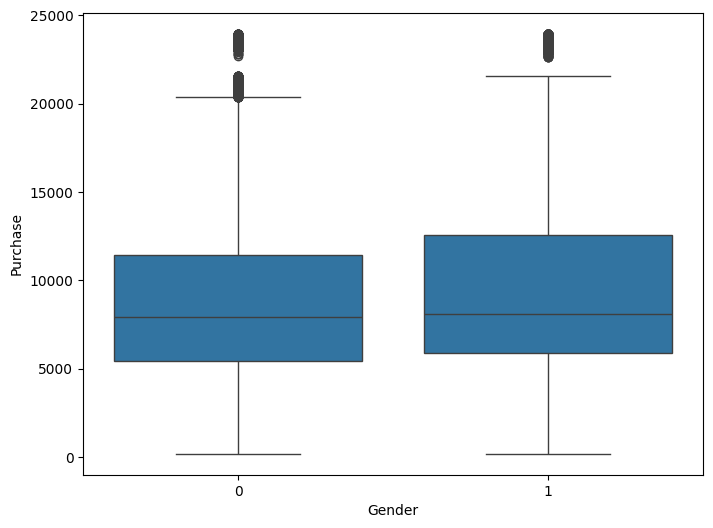

In [171]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Gender', y='Purchase')

На графике видно, что мужчины (1) в среднем тратят чуть больше, чем женщины (0). 

<Axes: xlabel='Age', ylabel='Purchase'>

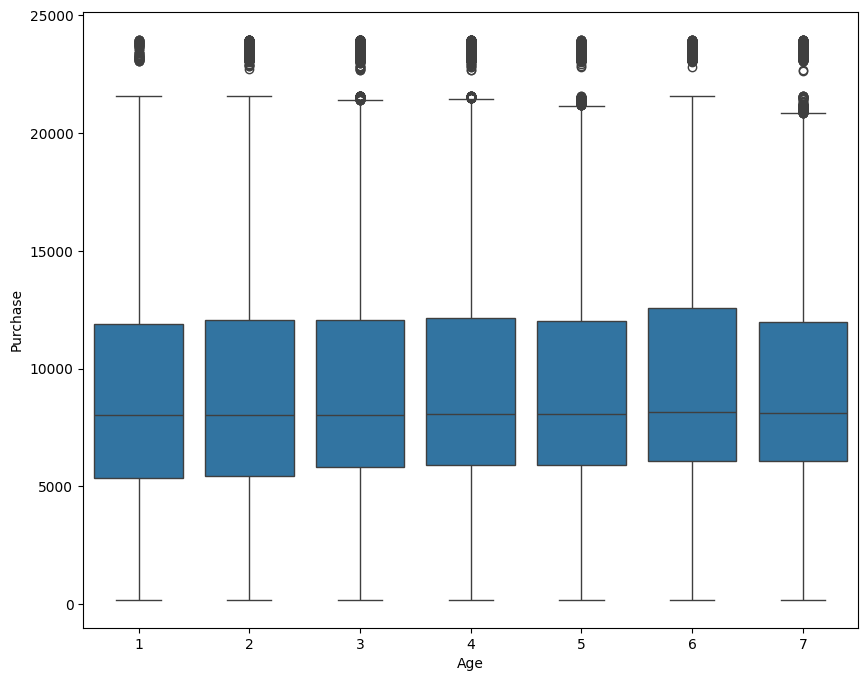

In [172]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, x='Age', y='Purchase')

Медианные значения довольно схожи между всеми возрастными группами.

In [173]:
def get_city_category(row):
    if row['City_Category_B'] == 1:
        return 'B'
    elif row['City_Category_C'] == 1:
        return 'C'
    else:
        return 'A'

data_city = data.copy()

data_city['City_Category'] = data_city.apply(get_city_category, axis=1)

<Axes: xlabel='City_Category', ylabel='Purchase'>

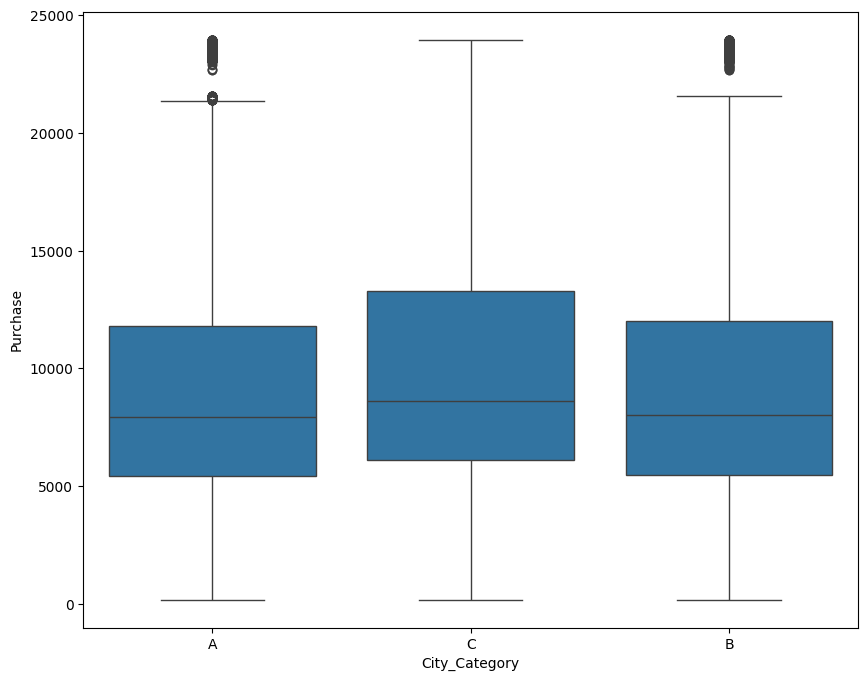

In [174]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data_city, x='City_Category', y='Purchase')

Жители городов категории C в среднем тратят больше, чем жители городов категорий A и B.

Нарисуйте матрицу корреляций признаков.

<Axes: >

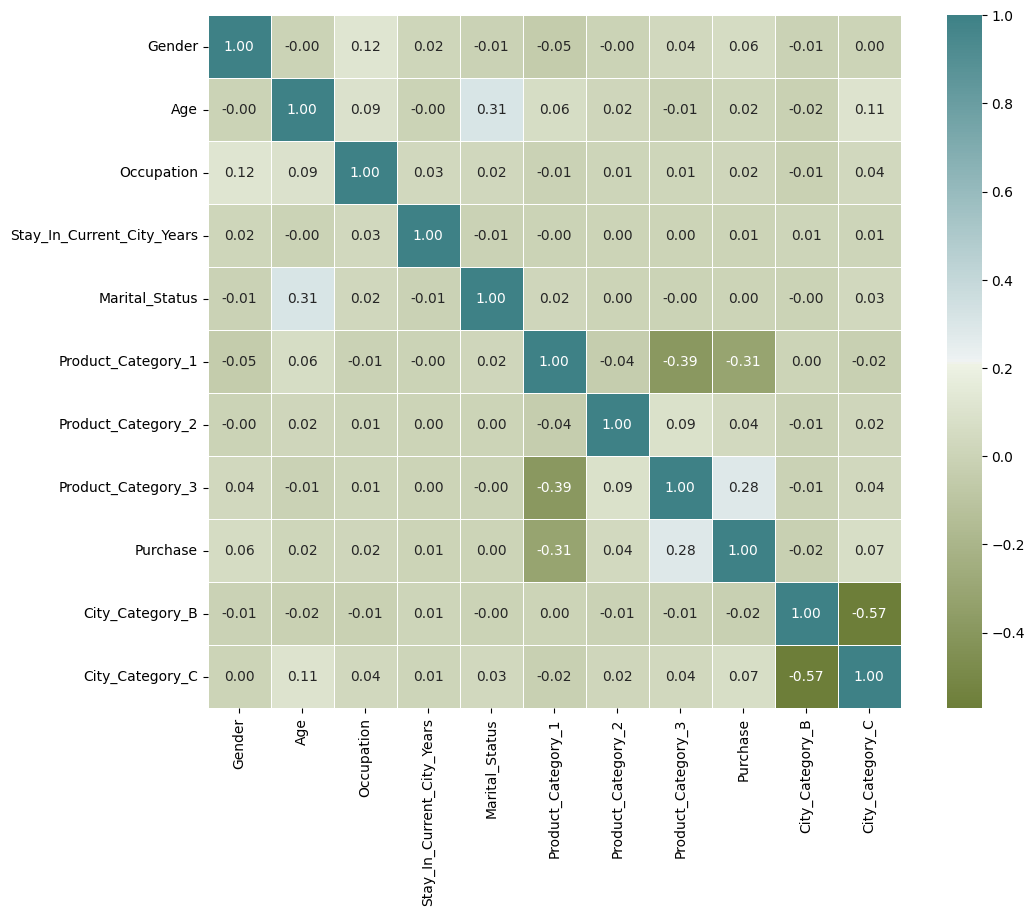

In [175]:
plt.figure(figsize=(12, 9))

corr = data.corr()

sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.2f',
            cmap=sns.diverging_palette(100, 200, as_cmap=True), square=True)

# Построение модели

Применим к нашим данным масштабирование: для того, чтобы модель лучше училась, будет неплохо привести все признаки к одному масштабу, иначе могут возникнуть проблемы с коэффициентами: если какой-то признак принимает очень большие значения, а другой - маленькие, модели будет сложно корректно подобрать веса. 

Стандартная формула для масштабирования:

$\hat{x} = \frac{x - \mu}{\sigma}$

In [176]:
X = data.copy().drop('Purchase', axis=1)
y = data['Purchase']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)

In [177]:
r2_score(ytrain, ypred_train), r2_score(ytest, ypred_test)

(0.13583618299501476, 0.1349472341373914)

In [178]:
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,Gender,209.875978
1,Age,134.821232
2,Occupation,38.842427
3,Stay_In_Current_City_Years,13.967254
4,Marital_Status,-21.325216
5,Product_Category_1,-1194.108936
6,Product_Category_2,52.325436
7,Product_Category_3,926.052241
8,City_Category_B,70.943952
9,City_Category_C,311.443260


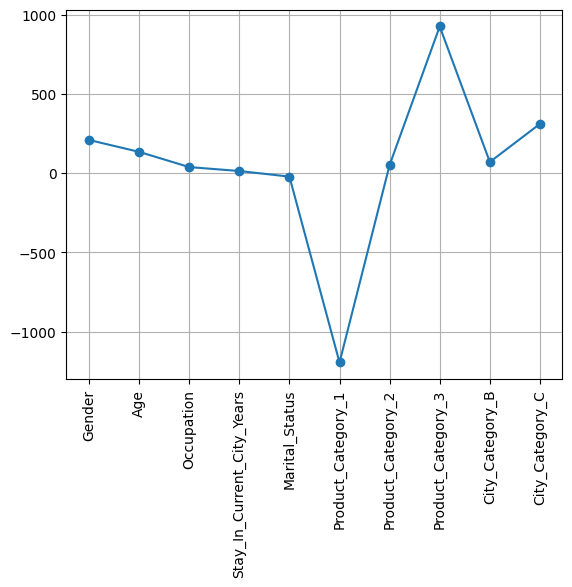

In [179]:
plt.plot(regressor.coef_, marker='o')
plt.xticks(ticks=range(len(X.columns)), labels=X.columns, rotation=90)
plt.grid(True)

Добавим L1 регуляризацию.

In [180]:
regressor2 = Lasso(alpha=10)
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
print(regressor2.coef_,'\n')

Scores: 0.13490487370793947 21525738.529546566
[  201.33826482   122.56442987    31.48345366     4.94525355
    -6.98313269 -1187.07216283    43.6808366    920.52678005
    48.54348746   290.35323145] 



Посмотрим, что происходит при разных значениях параметра регуляризации $\alpha$

In [181]:
for a in np.arange(0.1,100.1,25):
    regressor2 = Lasso(alpha=a)
    regressor2.fit(Xtrain, ytrain)

    ypred2 = regressor2.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
    print(regressor2.coef_,'\n')

alpha=0.1
Scores: 0.13494727374222637 21524683.510249883
[  209.79057742   134.69878377    38.76884216    13.87708511
   -21.18178276 -1194.03856657    52.23899218   925.9970247
    70.71900358   311.23180496] 

alpha=25.1
Scores: 0.1347137637397442 21530493.825329345
[  188.22565368   108.72270497    20.09589568     0.
    -0.         -1176.46511481    30.54216468   912.15059708
    14.58518785   258.3675509 ] 

alpha=50.1
Scores: 0.13429106221630294 21541011.700408168
[ 1.66628597e+02  8.75700742e+01  8.55532291e-01  0.00000000e+00
 -0.00000000e+00 -1.15841517e+03  8.60093993e+00  8.97917620e+02
  0.00000000e+00  2.29397497e+02] 

alpha=75.1
Scores: 0.1337612278520044 21554195.309520315
[  143.05695947    63.81635889     0.             0.
     0.         -1139.95214537     0.           882.31287341
     0.           208.18754192] 



**Видим, что L1-регуляризация зануляет некоторые веса и таким образом производит отбор признаков.**

Подберем оптимальное значение параметра регуляризации по кросс-валидации

In [187]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=111)
lasso_cv.fit(X, y)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        8.30854271,  8.35829146,  8.4080402 ,  8.45778894,  8.50753769,
        8.55728643,  8.60703518,  8.65678392,  8.70653266,  8.75628141,
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        cv=3, random_state=111)

In [188]:
lasso_cv.coef_

array([ 482.16976974,  103.49903741,    5.69793977,    9.52760257,
        -47.30585129, -317.88884738,    8.13663821,  148.34973621,
        145.94388277,  660.99699949])

In [189]:
lasso_cv.alpha_

0.1

Обучим модель с найденным параметром регуляризации $\alpha$

In [190]:
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))

Scores: 0.13583617829530026 0.13494727374222637


Добавим L2 регуляризацию.

In [191]:
from sklearn.linear_model import Ridge

for a in np.arange(0.1,10.1,2.5):
    regressor3 = Ridge(alpha=a)
    regressor3.fit(Xtrain, ytrain)

    ypred3 = regressor3.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:',r2_score(ytest,ypred3), mean_squared_error(ytest,ypred3))
    print(regressor3.coef_)

alpha=0.1
Scores: 0.13494723410223086 21524684.496592484
[  209.87594343   134.82118983    38.84243149    13.96725381
   -21.32520013 -1194.10870721    52.32544721   926.05211763
    70.94387411   311.44315689]
alpha=2.6
Scores: 0.13494723322055413 21524684.518530816
[  209.87507603   134.82013144    38.84253919    13.96724565
   -21.32479893 -1194.10299224    52.32572351   926.04903445
    70.94193183   311.44056822]
alpha=5.1
Scores: 0.13494723233377048 21524684.54059622
[  209.87420863   134.81907307    38.84264689    13.96723748
   -21.32439774 -1194.09727732    52.32599981   926.04595128
    70.93998961   311.4379796 ]
alpha=7.6
Scores: 0.13494723144187992 21524684.5627887
[  209.87334124   134.81801471    38.84275459    13.96722932
   -21.32399656 -1194.09156246    52.3262761    926.04286812
    70.93804745   311.43539105]


**Ridge регрессия не зануляет веса (они могут быть очень маленькими, но ненулевыми).**

Теперь подберем оптимальное a по кросс-валидации.

In [192]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5.80522552e-02,
       6.36824994e-02, 6.98587975e-0...
       1.18953407e+05, 1.30490198e+05, 1.43145894e+05, 1.57029012e+05,
       1.72258597e+05, 1.88965234e+05, 2.07292178e+05, 2.27396575e+05,
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06]),
        cv=3, scoring='neg_mean_squared_error')

In [193]:
ridge_cv.alpha_

104.73708979594487

In [194]:
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Scores: 0.13366260153612886 0.13289800756422876


Добавим одновременно и L1, и L2 регуляризацию.

У ElasticNet два параметра: alpha и l1_ratio. Используйте ElasticNet со значениями параметров alpha и l1_ratio равными 0.5.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [206]:
from sklearn.linear_model import ElasticNet

en_regressor = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=111)
en_regressor.fit(Xtrain, ytrain)

ypred_en_train = en_regressor.predict(Xtrain)
ypred_en_test = en_regressor.predict(Xtest)

r2_en_train = r2_score(ytrain, ypred_en_train)
r2_en_test = r2_score(ytest, ypred_en_test)

r2_en_train, r2_en_test

(0.13255987051031426, 0.13165457993953844)

### Посмотрим на веса, которые присвоила линейная регрессия признакам (regressor.coef_).

In [198]:
regressor3.coef_

array([  115.04701038,    35.35377045,     0.        ,     0.        ,
           0.        , -1117.95415967,     0.        ,   862.92777841,
          -0.        ,   182.87991787])

In [207]:
en_regressor.coef_

array([ 178.27537853,   99.70973823,   40.17938702,   12.8055027 ,
         -9.97840165, -993.42180288,   58.7095571 ,  805.24328085,
         20.32713442,  235.51762396])

Можно записать эти веса в таблицу рядом с названиями признаков (для удобства).

In [200]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor3.coef_))], axis = 1)
coefficients

,0,0
0,Gender,115.047010
1,Age,35.353770
2,Occupation,0.000000
3,Stay_In_Current_City_Years,0.000000
4,Marital_Status,0.000000
5,Product_Category_1,-1117.954160
6,Product_Category_2,0.000000
7,Product_Category_3,862.927778
8,City_Category_B,-0.000000
9,City_Category_C,182.879918


In [208]:
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(en_regressor.coef_))], axis = 1)
coefficients

,0,0
0,Gender,178.275379
1,Age,99.709738
2,Occupation,40.179387
3,Stay_In_Current_City_Years,12.805503
4,Marital_Status,-9.978402
5,Product_Category_1,-993.421803
6,Product_Category_2,58.709557
7,Product_Category_3,805.243281
8,City_Category_B,20.327134
9,City_Category_C,235.517624


In [204]:
len(data), len(Xtest)

(537577, 107516)

# Задание 2

Поработайте с датасетом affairs. Предскажите значение в колонке affairs по остальным факторам.

1. Сначала проведите разведочный анализ, а именно, исследуйте зависимость таргета от каждого фактора (или пары факторов).

2. Обучите линейную регрессию, посмотрите на качество на кросс-валидации, затем разбейте данные на train и test,
обучите алгоритм на train и сделайте предсказания на train и test, выведите ошибки.

3. Посмотрите на матрицу корреляций факторов и целевой переменной. 
Если есть пары сильно коррелирующих между собой факторов, удалите один из пары.

Если есть факторы, слабо коррелирующие с таргетом, удалите их.

Заново обучите алгоритм на обновленных данных. Как изменилось его качество?

In [265]:
data = pd.read_csv('affairs.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


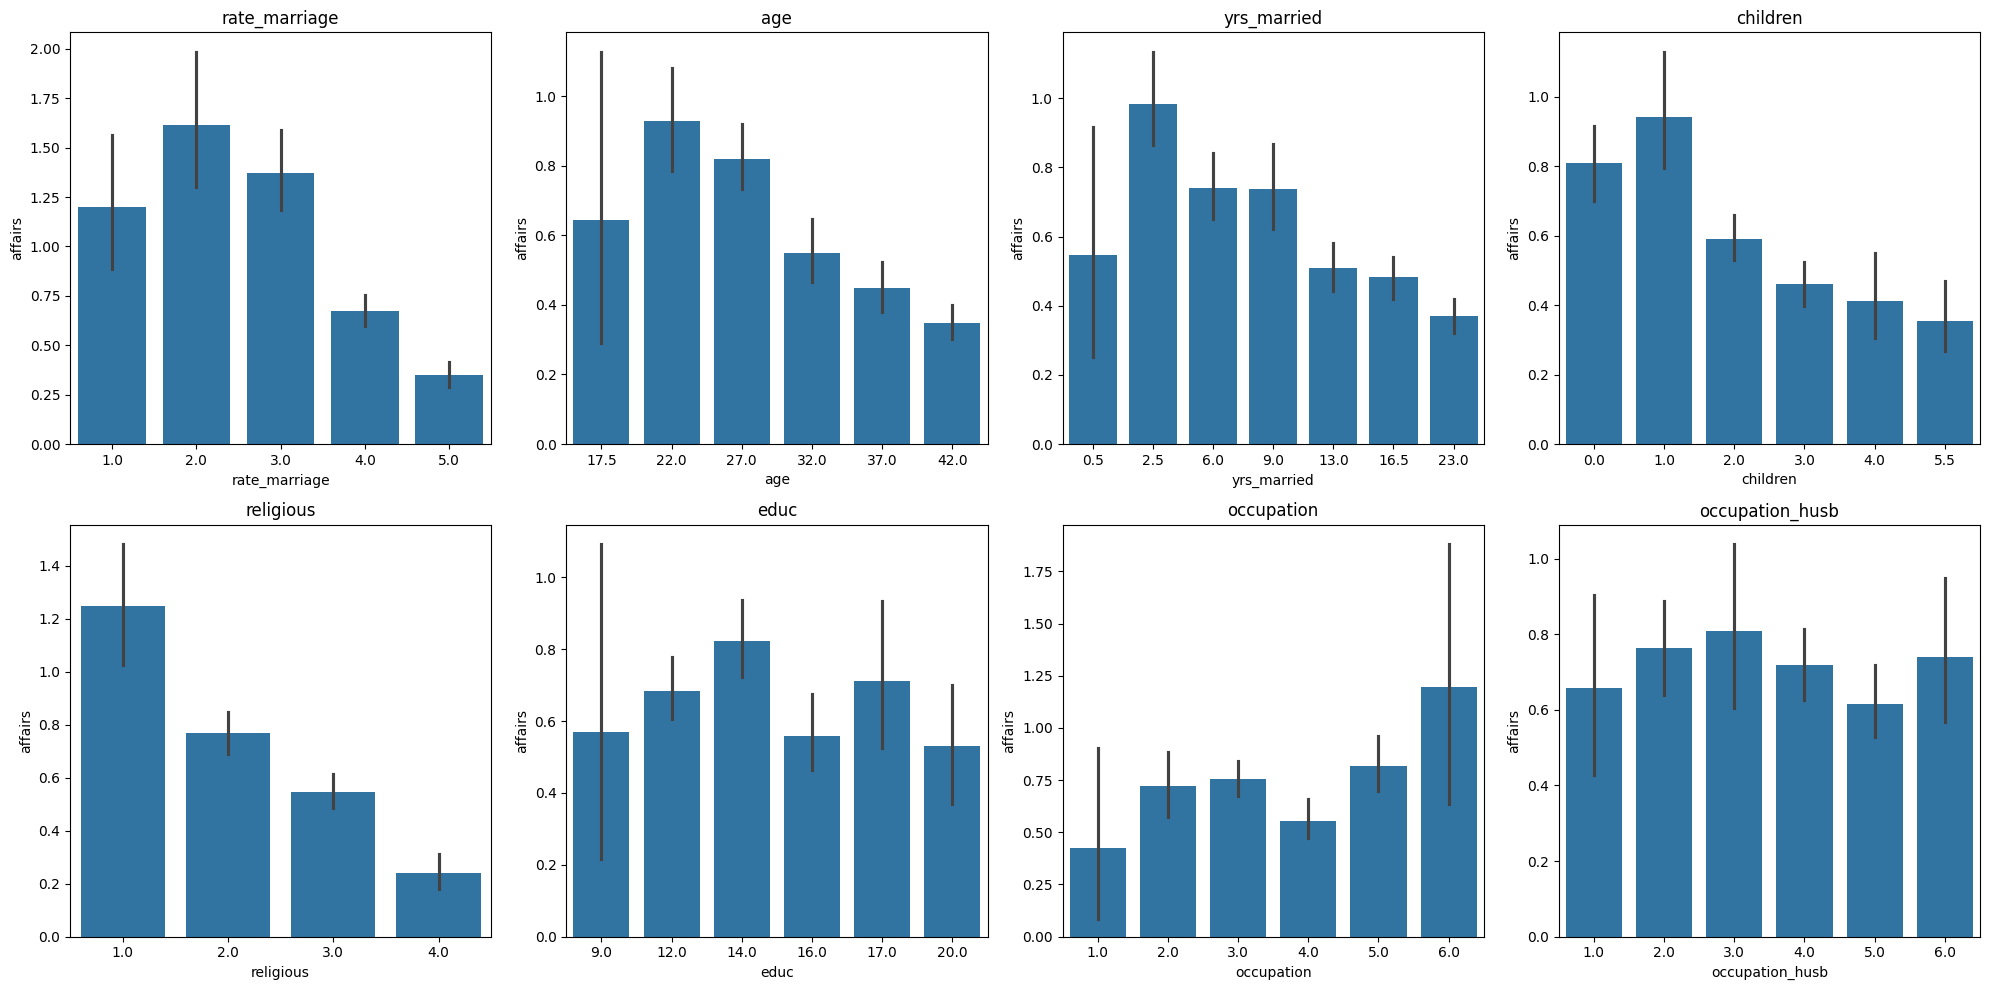

In [266]:
features = [c for c in data.columns if c != 'affairs']

plt.figure(figsize=(20, 10)) 

for i, feature in enumerate(features):
    plt.subplot(2, 4, i + 1) 
    sns.barplot(data, x=feature, y='affairs')  
    plt.title(feature)

plt.tight_layout()
plt.show()

В целом, средние значения affairs уменьшаются с увеличением оценки брака (rate_marriage), возраста (age), продолжительности брака (yrs_married), количества детей (children) и религиозности (religious). Наиболее выражено это у 'rate_marriage' и 'religious'.  
'educ', 'occupation' и 'occupation_husb' имеют очень слабую корреляцию с целевой переменной 'affairs'.

In [267]:
X = data.drop('affairs', axis=1)
y = data['affairs']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)

rmse_train = mean_squared_error(ytrain, ypred_train) ** 0.5
rmse_test = mean_squared_error(ytest, ypred_test) ** 0.5
r2_train = r2_score(ytrain, ypred_train)
r2_test = r2_score(ytest, ypred_test)

rmse_train, rmse_test, r2_train, r2_test

(2.1429392236047526,
 2.1399602715898838,
 0.054847152173398084,
 0.05278842767046832)

In [268]:
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,rate_marriage,-0.400157
1,age,-0.126184
2,yrs_married,-0.088893
3,children,-0.020000
4,religious,-0.221063
5,educ,-0.019383
6,occupation,0.024872
7,occupation_husb,0.009777


In [269]:
# Добавим L1 регуляризацию и подберем оптимальное значение alpha
lasso_alphas = np.logspace(-4, 2, 200)
lasso_cv = LassoCV(alphas=lasso_alphas, cv=3, random_state=42)
lasso_cv.fit(Xtrain, ytrain)

optimal_alpha_lasso = lasso_cv.alpha_

# Обучение модели Lasso с оптимальным alpha
lasso_regressor = Lasso(alpha=optimal_alpha_lasso)
lasso_regressor.fit(Xtrain, ytrain)

ypred_train_lasso = lasso_regressor.predict(Xtrain)
ypred_test_lasso = lasso_regressor.predict(Xtest)

rmse_train_lasso = mean_squared_error(ytrain, ypred_train_lasso) ** 0.5
rmse_test_lasso = mean_squared_error(ytest, ypred_test_lasso) ** 0.5
r2_train_lasso = r2_score(ytrain, ypred_train_lasso)
r2_test_lasso = r2_score(ytest, ypred_test_lasso)

optimal_alpha_lasso, rmse_train_lasso, rmse_test_lasso, r2_train_lasso, r2_test_lasso


(0.017027691722258997,
 2.143314965085274,
 2.1420974783347666,
 0.054515678223182595,
 0.05089549733977483)

In [270]:
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(lasso_regressor.coef_))], axis = 1)
coefficients

,0,0
0,rate_marriage,-0.381759
1,age,-0.118760
2,yrs_married,-0.080849
3,children,-0.010157
4,religious,-0.208605
5,educ,-0.000000
6,occupation,0.000003
7,occupation_husb,0.000000


In [271]:
# Добавим L2 регуляризацию и подберем оптимальное значение alpha
ridge_alphas = np.logspace(-4, 4, 200)
ridge_cv = RidgeCV(alphas=ridge_alphas, cv=3, scoring='neg_mean_squared_error')
ridge_cv.fit(Xtrain, ytrain)

optimal_alpha_ridge = ridge_cv.alpha_

# Обучение модели Ridge с оптимальным alpha
ridge_regressor = Ridge(alpha=optimal_alpha_ridge)
ridge_regressor.fit(Xtrain, ytrain)

ypred_train_ridge = ridge_regressor.predict(Xtrain)
ypred_test_ridge = ridge_regressor.predict(Xtest)

rmse_train_ridge = mean_squared_error(ytrain, ypred_train_ridge) ** 0.5
rmse_test_ridge = mean_squared_error(ytest, ypred_test_ridge) ** 0.5
r2_train_ridge = r2_score(ytrain, ypred_train_ridge)
r2_test_ridge = r2_score(ytest, ypred_test_ridge)

optimal_alpha_ridge, rmse_train_ridge, rmse_test_ridge, r2_train_ridge, r2_test_ridge

(170.27691722259013,
 2.1429942932317334,
 2.1399900056938135,
 0.054798574142830514,
 0.052762105048149044)

In [272]:
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(ridge_regressor.coef_))], axis = 1)
coefficients

,0,0
0,rate_marriage,-0.387209
1,age,-0.119293
2,yrs_married,-0.088456
3,children,-0.023361
4,religious,-0.215431
5,educ,-0.019671
6,occupation,0.022854
7,occupation_husb,0.008791


<Axes: >

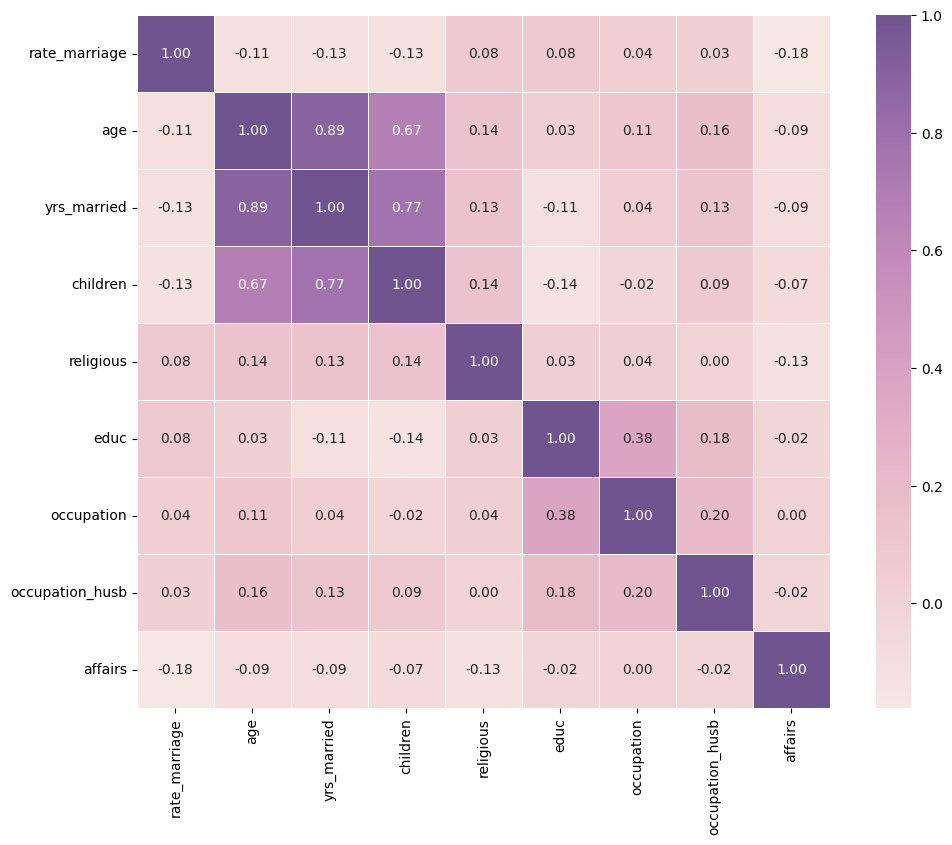

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))

corr = data.corr()

sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.2f',
            cmap=sns.cubehelix_palette(gamma=.5, as_cmap=True), square=True)

Признаки 'age' и 'yrs_married' сильно коррелируют друг с другом.  
Как мы уже определили ранее, некоторые признаки, такие как 'educ', 'occupation' и 'occupation_husb' имеют очень слабую корреляцию с целевой переменной 'affairs'.

In [274]:
# Удаляем признаки
data_reduced = data.drop(['age', 'educ', 'occupation', 'occupation_husb'], axis=1)

X_reduced = data_reduced.drop('affairs', axis=1)
y_reduced = data_reduced['affairs']

# Масштабирование данных
X_reduced_scaled = scaler.fit_transform(X_reduced)

Xtrain_reduced, Xtest_reduced, ytrain_reduced, ytest_reduced = train_test_split(X_reduced_scaled, y_reduced, test_size=0.2, random_state=42)

# Обучение модели на обновленных данных
regressor = LinearRegression()
regressor.fit(Xtrain_reduced, ytrain_reduced)

ypred_train_reduced = regressor.predict(Xtrain_reduced)
ypred_test_reduced = regressor.predict(Xtest_reduced)

rmse_train = mean_squared_error(ytrain_reduced, ypred_train_reduced) ** 0.5
rmse_test = mean_squared_error(ytest_reduced, ypred_test_reduced) ** 0.5
r2_train = r2_score(ytrain_reduced, ypred_train_reduced)
r2_test = r2_score(ytest_reduced, ypred_test_reduced)

rmse_train, rmse_test, r2_train, r2_test

(2.143876118056207,
 2.1411602119107256,
 0.05402052860741713,
 0.051725869607756936)

Выводы:  
1. Качество модели оставалось сравнительно низким на всех этапах.  
2. Регуляризация не привела к значительному улучшению.  
3. Удаление коррелирующих и нерелевантных признаков тоже не привело к улучшению производительности модели.  

В целом, следует использовать более сложные модели или проводить более тщательный анализ данных.

# Задание 3. 

Поработайте с датасетом House Sales in King County. Обратите внимание, что не все признаки в датасете полезны. Целевая переменная - очевидно, price. 

In [ ]:
#your code here